In [42]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
#  reading files from local machine 

train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [44]:
# cheking data types

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [45]:
#checking top 5 rows
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# adding new column named Loan_status to test set 

as the test dataset is not having this column

In [47]:
test['Loan_Status'] = 0

In [48]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


# now concatenating the train and test dataset into one

In [49]:
x = pd.concat([train,test],axis = 0)

# now we will convert the loan id column into numeric form

as loan id has 'LP' as prefix, we will remove this for the model understandable form

In [50]:
x['Loan_ID']=x['Loan_ID'].str.extract('(\d+)').astype(np.float)

In [51]:
x.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002.0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1003.0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


# now we will check if there are any null values using seaborn heatplot

yellow line shoes the places where it is empty 

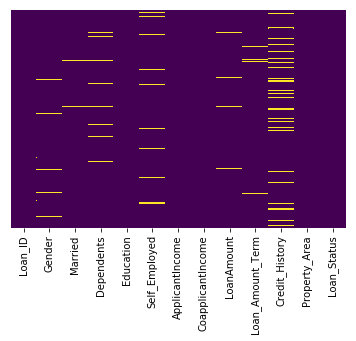

In [52]:
sns.heatmap(x.isnull(),yticklabels=False,cbar=False,cmap='viridis')

checking null values and analyse majority of gender in the sector

In [53]:
x['Gender'].isnull().value_counts() # null value count

False    957
True      24
Name: Gender, dtype: int64

In [54]:
x['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [55]:
# here we can see that only 24 values are empty and majoirty of the person apllying are male therefore imputing male in the null places.

In [56]:
x['Gender']= x.Gender.map({'Male':0,'Female':1 , np.NaN : 0}).astype(np.float)

In [57]:
x['Gender'].value_counts() # here we can see clearly that all the values have been filled with numerice form

0.0    799
1.0    182
Name: Gender, dtype: int64

In [58]:
x['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [59]:
x['Married'].isnull().value_counts() # as here we see that married are more therefore we will impute married in the empty spaces

False    978
True       3
Name: Married, dtype: int64

In [60]:
x['Married']= x.Married.map({'Yes':0,'No':1 , np.NaN : 0}).astype(np.float)

In [61]:
x['Married'].value_counts()

0.0    634
1.0    347
Name: Married, dtype: int64

In [62]:
# now converting education into numeric form also  education is totally filled

In [63]:
x['Education'].value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

In [64]:
x['Education']= x.Education.map({'Graduate':0,'Not Graduate':1}).astype(np.float)

In [65]:
x['Education'].value_counts()

0.0    763
1.0    218
Name: Education, dtype: int64

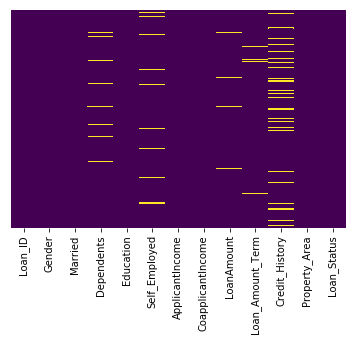

In [66]:
sns.heatmap(x.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [67]:
x['Dependents'].isnull().value_counts()

False    956
True      25
Name: Dependents, dtype: int64

In [68]:
x['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [69]:
# imputing 0 as the number of dependents

In [70]:
x['Dependents']= x.Dependents.map({'0':0,'1':1 ,'2':2,'3+':3, np.NaN : 0}).astype(np.float)

In [71]:
x['Dependents'].value_counts()

0.0    570
2.0    160
1.0    160
3.0     91
Name: Dependents, dtype: int64

In [72]:
x['Self_Employed'].isnull().value_counts() # nul value counts

False    926
True      55
Name: Self_Employed, dtype: int64

In [73]:
x['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [78]:
# here we can see that all the nan values has less income also people with low income are eqully devided.


In [40]:
#plt.(x['Education'], x['Property_Area'],alpha= 0.1)
#plt.show()

In [80]:
# let us first convert  all the variable in numerice form to check correlation matrix

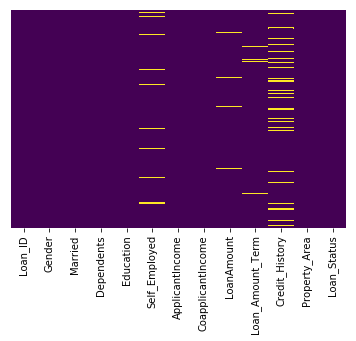

In [81]:
sns.heatmap(x.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [82]:
#x['Self_Employed']= x.Self_Employed.map({'No':0,'Yes':1}).astype(np.float) # here nan wii still remain nan values

In [83]:
#x['Self_Employed'].isnull().value_counts()

In [84]:
x['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [85]:
x['Property_Area'].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [86]:
x['Property_Area']= x.Property_Area.map({'Semiurban':0,'Urban':1,'Rural':2}).astype(np.float)

In [87]:
x['Property_Area'].value_counts()

0.0    349
1.0    342
2.0    290
Name: Property_Area, dtype: int64

In [91]:
x.corr()

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,1.000000,0.032055,-0.003248,0.032076,0.023989,0.011644,0.024884,0.001909,-0.015285,-0.010827,0.110917
Gender,0.032055,1.000000,0.327012,-0.139248,-0.040649,-0.060444,-0.082428,-0.097640,0.070238,-0.022663,-0.094665
Married,-0.003248,0.327012,1.000000,-0.344291,-0.026211,-0.052126,-0.061606,-0.158671,0.048638,-0.022907,-0.002995
Dependents,0.032076,-0.139248,-0.344291,1.000000,0.084894,0.122136,0.003223,0.151004,-0.083281,-0.046848,-0.005794
Education,0.023989,-0.040649,-0.026211,0.084894,1.000000,-0.138909,-0.060380,-0.165053,-0.024396,-0.066182,0.036897
ApplicantIncome,0.011644,-0.060444,-0.052126,0.122136,-0.138909,1.000000,-0.114247,0.551811,-0.023089,0.023378,0.005318
CoapplicantIncome,0.024884,-0.082428,-0.061606,0.003223,-0.060380,-0.114247,1.000000,0.179228,-0.043860,-0.027253,0.036306
LoanAmount,0.001909,-0.097640,-0.158671,0.151004,-0.165053,0.551811,0.179228,1.000000,0.055636,-0.008235,0.025063
Loan_Amount_Term,-0.015285,0.070238,0.048638,-0.083281,-0.024396,-0.023089,-0.043860,0.055636,1.000000,-0.020439,-0.008520
Credit_History,-0.010827,-0.022663,-0.022907,-0.046848,-0.066182,0.023378,-0.027253,-0.008235,-0.020439,1.000000,-0.021751


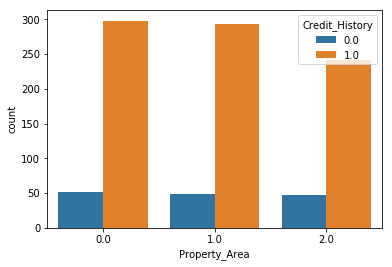

In [179]:
sns.countplot(x='Property_Area',hue='Credit_History',data=x)

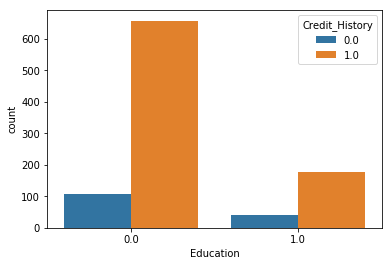

In [180]:
sns.countplot(x='Education',hue='Credit_History',data=x)

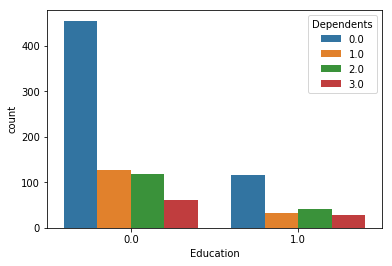

In [181]:
sns.countplot(x='Education',hue='Dependents',data=x)

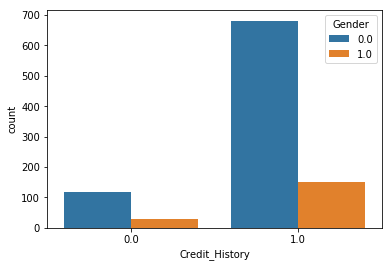

In [182]:
sns.countplot(x='Credit_History',hue='Gender',data=x)

In [92]:
# here we can see that the loan amount is havin high corelation with applicantincome

In [93]:
x['Self_Employed']= x.Self_Employed.map({'No':0,'Yes':1 ,np.NaN : 0}).astype(np.float) # as self employed hase a ration of 8:1 for employed and not
# therefore directly imputing  self employed as yes for null values

In [94]:
x['Self_Employed'].value_counts()

0.0    862
1.0    119
Name: Self_Employed, dtype: int64

In [95]:
 # now self employes has been imputed

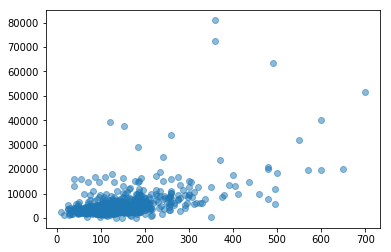

In [97]:
plt.scatter(x['LoanAmount'], x['ApplicantIncome'],alpha=0.5)
plt.show()
# loan amount is on y axis

In [98]:
# here we can see that loan amount is heavily concentrated in a particular range.


In [99]:
x['LoanAmount'].isnull().value_counts()

False    954
True      27
Name: LoanAmount, dtype: int64

In [100]:
x['LoanAmount'].median()# imputing the median in null values

126.0

In [101]:
x['LoanAmount'].mean()

142.51153039832286

In [102]:
# here the data seems to be right skewed 

In [103]:
def loan1(ln):
    l = ln
    if pd.isnull(l):
        return 126.0
    else: 
        return l

In [104]:
x['LoanAmount'] = x['LoanAmount'].apply(loan1)

In [105]:
# after this still median should not be changed

In [106]:
x['LoanAmount'].median()

126.0

In [107]:
x['LoanAmount'].mean()

142.05708460754332

In [108]:
x['LoanAmount'].isnull().value_counts()

False    981
Name: LoanAmount, dtype: int64

In [109]:
# now we will handle the remaining data

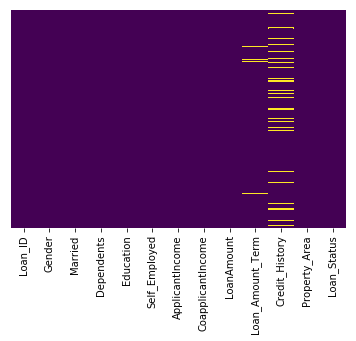

In [110]:
sns.heatmap(x.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [111]:
x['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [112]:
# here majority loan term are 360.0 therefore imputinh the same

In [113]:
def term(ln):
    l = ln
    if pd.isnull(l):
        return 360.0
    else: 
        return l

In [114]:
x['Loan_Amount_Term'] = x['Loan_Amount_Term'].apply(term)

In [115]:
x['Loan_Amount_Term'].value_counts()

360.0    843
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [116]:
# now loan amount term has also been imputed

In [117]:
x['Credit_History'].isnull().value_counts()

False    902
True      79
Name: Credit_History, dtype: int64

In [118]:
x['Credit_History'].value_counts() # majority has credit history as 1

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [119]:
def ln(ln):
    l = ln
    if pd.isnull(l):
        return 1.0
    else: 
        return l

In [120]:
x['Credit_History'] = x['Credit_History'].apply(ln)

In [121]:
x['Credit_History'].value_counts()

1.0    833
0.0    148
Name: Credit_History, dtype: int64

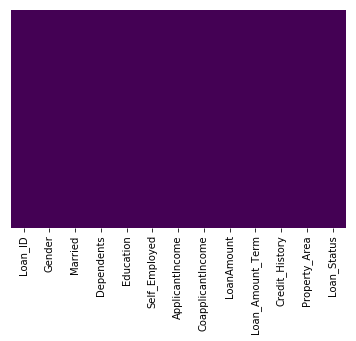

In [122]:
sns.heatmap(x.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [124]:
x.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002.0,0.0,1.0,0.0,0.0,0.0,5849,0.0,126.0,360.0,1.0,1.0,Y
1,1003.0,0.0,0.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,2.0,N
2,1005.0,0.0,0.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,1.0,Y
3,1006.0,0.0,0.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,1.0,Y
4,1008.0,0.0,1.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,1.0,Y


In [125]:
# now spliting the data into the original train and test set

In [126]:
x_trn = x.iloc[:614,:]
x_tst = x.iloc[614:,:]

In [127]:
x_tst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              367 non-null float64
Gender               367 non-null float64
Married              367 non-null float64
Dependents           367 non-null float64
Education            367 non-null float64
Self_Employed        367 non-null float64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null float64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null float64
Loan_Status          367 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 40.1+ KB


In [128]:
x_trn['Loan_Status']= x_trn.Loan_Status.map({'N':0,'Y':1 }).astype(np.int)

/home/bhushan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [129]:
x_trn.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002.0,0.0,1.0,0.0,0.0,0.0,5849,0.0,126.0,360.0,1.0,1.0,1
1,1003.0,0.0,0.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,2.0,0
2,1005.0,0.0,0.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,1.0,1
3,1006.0,0.0,0.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,1.0,1
4,1008.0,0.0,1.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,1.0,1
5,1011.0,0.0,0.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,1.0,1
6,1013.0,0.0,0.0,0.0,1.0,0.0,2333,1516.0,95.0,360.0,1.0,1.0,1
7,1014.0,0.0,0.0,3.0,0.0,0.0,3036,2504.0,158.0,360.0,0.0,0.0,0
8,1018.0,0.0,0.0,2.0,0.0,0.0,4006,1526.0,168.0,360.0,1.0,1.0,1
9,1020.0,0.0,0.0,1.0,0.0,0.0,12841,10968.0,349.0,360.0,1.0,0.0,0


In [130]:
x_trn_x = x_trn.iloc[:,1:-1] # splitting data into dependent and independent variable
#   x_trn_x independent variable

In [131]:
x_trn_y = x_trn.iloc[:,12] # dependent variable

In [132]:
x_trn_y.head(5)

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [133]:
x_trn_x.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,0.0,0.0,0.0,5849,0.0,126.0,360.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,2.0
2,0.0,0.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,1.0


In [134]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_trn_x, x_trn_y, test_size = 0.20 , random_state = 0)

/home/bhushan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [135]:
# scaling the data for bringing all variable in same range.
# please note it does not change the actual location in space of data points

In [136]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [138]:
# applying random forest classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 400, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [140]:
y_pred = classifier.predict(X_test) # predicicting X_test to validate

In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [142]:
cm

array([[15, 18],
       [ 8, 82]])

In [143]:
x_tst_final = x_tst.iloc[:,1:-1] # original test data

In [144]:
x_tst_final.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.0,0.0,0.0,5720,0.0,110.0,360.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,3076,1500.0,126.0,360.0,1.0,1.0


In [145]:
y_pred_final = classifier.predict(x_tst_final)

In [147]:
#applying neual netword using keras

In [148]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [149]:
model = Sequential()
model.add(Dense(4, input_shape=(11,), activation='sigmoid'))
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

In [150]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [151]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 48        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [152]:
x_trn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null float64
Gender               614 non-null float64
Married              614 non-null float64
Dependents           614 non-null float64
Education            614 non-null float64
Self_Employed        614 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null float64
Loan_Status          614 non-null int64
dtypes: float64(11), int64(2)
memory usage: 67.2 KB


In [153]:
model.fit(x_trn_x,x_trn_y , epochs=40)

Epoch 1/40
614/614 [==============================] - 1s 1ms/step - loss: 0.6547 - acc: 0.6596
Epoch 2/40
614/614 [==============================] - 0s 38us/step - loss: 0.6270 - acc: 0.6873
Epoch 3/40
614/614 [==============================] - 0s 48us/step - loss: 0.6237 - acc: 0.6873
Epoch 4/40
614/614 [==============================] - 0s 40us/step - loss: 0.6251 - acc: 0.6873
Epoch 5/40
614/614 [==============================] - 0s 48us/step - loss: 0.6264 - acc: 0.6873
Epoch 6/40
614/614 [==============================] - 0s 39us/step - loss: 0.6239 - acc: 0.6873
Epoch 7/40
614/614 [==============================] - 0s 45us/step - loss: 0.6239 - acc: 0.6873
Epoch 8/40
614/614 [==============================] - 0s 49us/step - loss: 0.6246 - acc: 0.6873
Epoch 9/40
614/614 [==============================] - 0s 41us/step - loss: 0.6250 - acc: 0.6873
Epoch 10/40
614/614 [==============================] - 0s 204us/step - loss: 0.6234 - acc: 0.6873
Epoch 11/40
614/614 [==================

In [154]:
x_tst_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               367 non-null float64
Married              367 non-null float64
Dependents           367 non-null float64
Education            367 non-null float64
Self_Employed        367 non-null float64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null float64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null float64
dtypes: float64(10), int64(1)
memory usage: 34.4 KB


In [155]:
temp_class = model.predict(x_tst_final) > 0.5

In [156]:
temp_class = pd.DataFrame(temp_class)

In [157]:
def returnp(ln):
    l = ln
    if l == True :
        return 'Y'
    else: 
        return 'N'

In [158]:
temp_class[0] = temp_class[0].apply(returnp)

In [160]:
# applying logistin regression

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
logmodel=LogisticRegression()

In [163]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [164]:
predictions=logmodel.predict(X_test)

In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.88      0.45      0.60        33
          1       0.83      0.98      0.90        90

avg / total       0.84      0.84      0.82       123



In [166]:
# precission is 84 percent

In [167]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0


In [168]:
y_pred_final = pd.DataFrame(y_pred_final)

In [169]:
####### for logistic regression #######################

In [170]:
predict = logmodel.predict(x_tst_final)

In [171]:
predict = pd.DataFrame(predict)

In [172]:
# return processing

In [173]:
def returnp(ln):
    l = ln
    if l == 1 :
        return 'Y'
    else: 
        return 'N'

In [174]:
predict[0] = predict[0].apply(returnp)

In [175]:
y_pred_final.head()

,0
0,1
1,0
2,1
3,1
4,0


In [176]:
# converting the file into dataframe
submission = pd.DataFrame({
        
        "Loan_ID": test["Loan_ID"],
        "Loan_Status":predict[0]
        } )
cols=["Loan_ID","Loan_Status"]
submission=submission.reindex(columns=cols)

In [177]:
submission.to_csv('loan_int.csv',index = False) # saving the file in csv format